In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing the libraries

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

## Preparing Data

In [3]:
# read data
data = pd.read_excel(r'/content/drive/MyDrive/TA (1)/Processing Data/Data/raw data/data_after_cleansing.xlsx',sheet_name="Baron")
data

,Date,Hours,Hs [m],Angin [m/s]
0,2014-07-14 07:56:00,1,2.060,3.618206
1,2014-07-14 08:56:00,2,2.326,3.325107
2,2014-07-14 09:56:00,3,2.280,3.218061
3,2014-07-14 10:56:00,4,2.280,2.976261
4,2014-07-14 11:56:00,5,2.326,2.594406
...,...,...,...,...
1256,2014-09-04 15:56:00,1257,1.098,0.853453
1257,2014-09-04 16:56:00,1258,1.044,0.119597
1258,2014-09-04 17:56:00,1259,1.098,0.681651
1259,2014-09-04 18:56:00,1260,0.966,1.093551


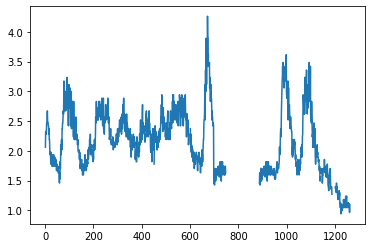

In [4]:
# plotting raw data
plt.plot(data['Hours'],data['Hs [m]'])
plt.show()

In [5]:
import copy
data_raw = copy.deepcopy(data)

In [6]:
count_nan = data_raw['Hs [m]'].isna().sum()
print("Jumlah Data : ", len(data_raw))
print("Jumlah NaN Data : ", count_nan)

Jumlah Data :  1261
Jumlah NaN Data :  163


### Interpolation

In [10]:
# import library
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline

In [11]:
# define other dataframe for interpolate 
data2 = copy.deepcopy(data)
data3 = copy.deepcopy(data)
data4 = copy.deepcopy(data)

In [12]:
# drop NaN value in dataframe data
data = data.dropna()

In [13]:
# cubic interpolation
y_fc=interp1d(data['Hours'],data['Hs [m]'], kind='cubic')

In [14]:
# quadratic interpolation
y_fq=interp1d(data['Hours'],data['Hs [m]'], kind='quadratic')

In [15]:
# linear interpolation
y_fl=interp1d(data['Hours'],data['Hs [m]'], kind='linear')

In [16]:
# interpolate using function we define before
import math

for i in data2['Hours'] :
  if math.isnan(data2['Hs [m]'][i-1])== True:
    data2['Hs [m]'][i-1] = y_fc(i)
    data3['Hs [m]'][i-1] = y_fq(i)
    data4['Hs [m]'][i-1] = y_fl(i)
  else:
    pass
#data.loc[data['Hs [m]'].isna()]

<ipython-input-16-86623d2f7eed>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-86623d2f7eed>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-86623d2f7eed>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



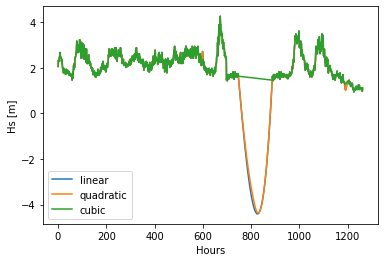

In [17]:
# plot after interpolation
plt.plot(data2['Hours'],data2['Hs [m]'], label ='linear')
plt.plot(data3['Hours'],data3['Hs [m]'], label ='quadratic')
plt.plot(data4['Hours'],data4['Hs [m]'], label ='cubic')
#plotting scatter point of data
plt.xlabel('Hours')
plt.ylabel('Hs [m]')
plt.legend()
plt.show()

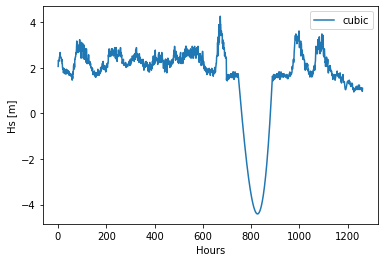

In [18]:
# plot after interpolation
plt.plot(data2['Hours'],data2['Hs [m]'], label ='cubic')
#plotting scatter point of data
plt.xlabel('Hours')
plt.ylabel('Hs [m]')
plt.legend()
plt.show()

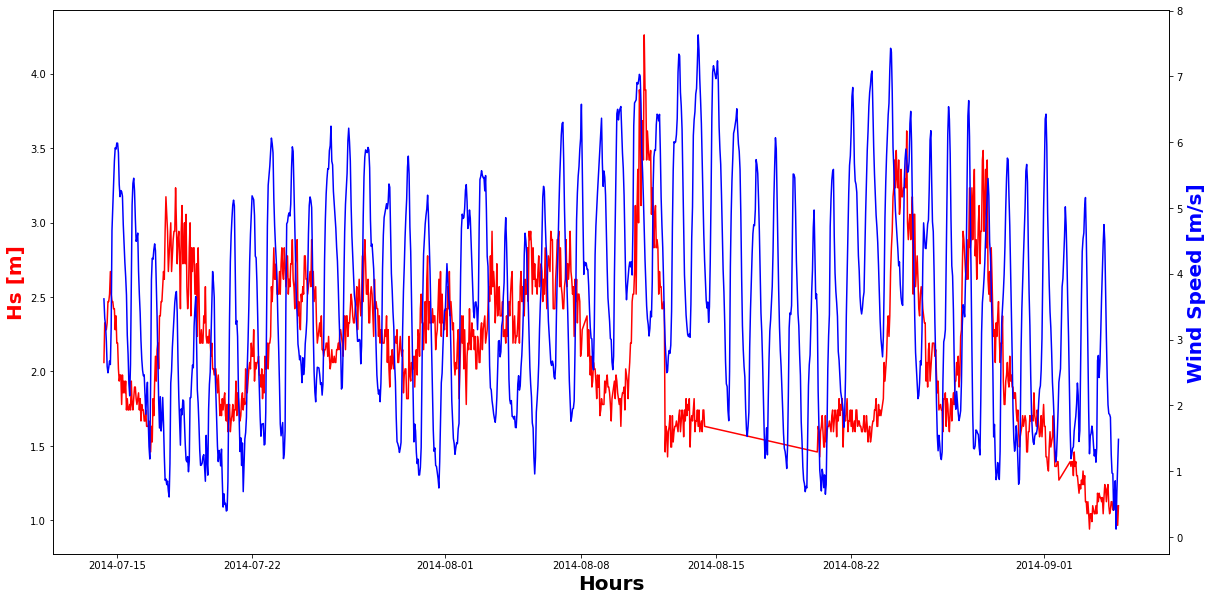

In [22]:
# plotting wind and wave
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
ax.plot(data4['Date'],
        data4['Hs [m]'],
        color="red", 
        )
# set x-axis label
ax.set_xlabel("Hours",fontsize=20,fontweight='bold')
# set y-axis label
ax.set_ylabel("Hs [m]",
              color="red",
              fontsize=20,fontweight='bold')

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data4['Date'],
        data4['Angin [m/s]'],color="blue")
ax2.set_ylabel("Wind Speed [m/s]",color="blue",fontsize=20,fontweight='bold')
plt.show()

In [42]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data['Angin [m/s]'],data['Hs [m]'])
corr

0.10272653033047395

karena data tidak berdistribusi normal -> ada skew nya (positif) makanya buat scaling data pake -> Normalize Data

## Linear Regression 1 Variable

In [23]:
X = data4.iloc[:, 1].values
Y = data4.iloc[:, 2].values
X = X.reshape(-1,1)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=data4['Date'], y=model.predict(X),
                    mode='lines',
                    name='Linear Regression'))
fig.add_trace(go.Scatter(x=data4['Date'], y=Y,
                    mode='markers',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>',
                  height=600, width=1200)


In [26]:
y_pred = model.predict(X)
y_pred

array([2.42114541, 2.42061793, 2.42009044, ..., 1.75756777, 1.75704028,
       1.75651279])

In [27]:
from sklearn.metrics import r2_score
r2_score(Y, y_pred)

0.12755424427001916

## Linear Regression 2 Variable

In [28]:
X2 = data4.iloc[:, [1,3]].values
Y2 = data4.iloc[:, 2].values

In [29]:
model = LinearRegression()
model.fit(X2,Y2)

LinearRegression()

In [30]:
y_pred2 = model.predict(X2)

In [31]:
r2_score(Y2,y_pred2)

0.13692754338621327

In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_trace(go.Scatter(x=data4['Date'], y=model.predict(X2),
                    mode='markers',
                    name='Multiple Linear Regression'))
fig.add_trace(go.Scatter(x=data4['Date'], y=Y2,
                    mode='markers',
                    name='Observation'))

# Edit the layout
fig.update_layout( xaxis_title='<b>Date</b>',
                   yaxis_title='<b><i>Hs</i> [m]</b>',
                  height=600, width=1200)


### verif


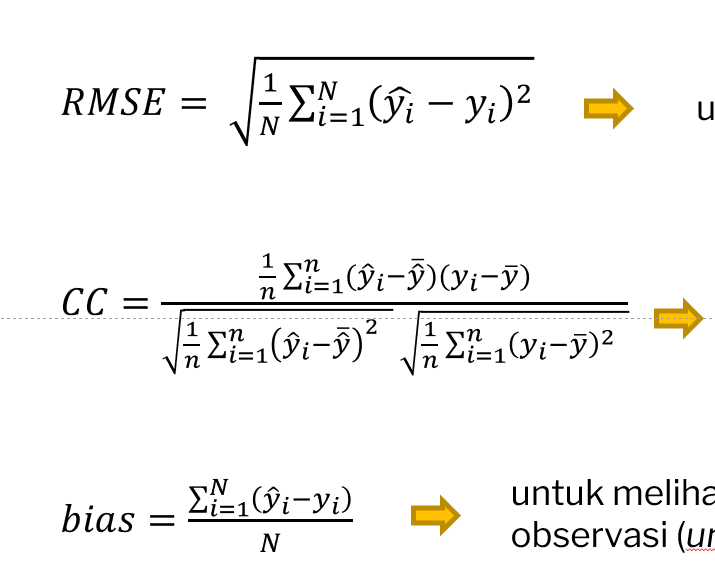

In [35]:
# bias 
gap_sum = 0
for j in range(len(Y2)):
  gap = y_pred2[j] - Y2[j]
  gap_sum += gap

bias = gap_sum/len(Y2)
bias

6.145405798480248e-17

In [36]:
# bias 
gap_sum = 0
for j in range(len(Y)):
  gap = y_pred[j] - Y[j]
  gap_sum += gap

bias = gap_sum/len(Y)
bias

1.3664283380001927e-16

In [37]:
# coefficiect correlation 
mean_pred = y_pred2.mean()
mean_obv = Y2.mean()
atas = 0
a_sum = 0
b_sum = 0
for i in range(len(Y2)):
  a = y_pred2[i] - mean_pred
  b = Y2[i] - mean_obv
  c = a*b
  atas +=c
  a_sqr = a**2
  b_sqr = b**2
  a_sum += a_sqr
  b_sum += b_sqr

konst = 1/len(Y2)
cc = konst* atas / ((konst*a_sum)**0.5) * ((konst*b_sum)**0.5)
cc

0.10695999190063125

In [38]:
from scipy.stats import pearsonr
corr, _ = pearsonr(Y2,y_pred2)
corr

0.370037218920223

In [39]:
from scipy.stats import pearsonr
corr, _ = pearsonr(Y,y_pred)
corr

0.35714737052093626

In [40]:
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(Y,y_pred)
RMSE = math.sqrt(MSE)
RMSE

0.5021774345042199

In [41]:
MSE = mean_squared_error(Y2,y_pred2)
RMSE = math.sqrt(MSE)
RMSE

0.49947252680078175